In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

### Acquire

In [2]:
# Created an acquire.py file that runs a SQL query to join the databases from the codeup library, and created a
# pandas dataframe with that query, after that I saved it to a csv, and have to function check for the csv.
df = acquire.get_cohort_data()

### Prepare

**Prepare summary**

##### List of things my clean_cohort_data function does.
- Combined the date and time column into a datetime, and converted the datatype to datetime.
- Placed my new datetime column to the index for later use.
- Replaced the program_id with its corresponding program name and subdomain.
- Dropped unnecessary columns 'date','time','deleted_at','program_id','id'.
- Renamed 'name' to 'cohort_name' for my personal readability.
- Created a dictionary to map cohort name to cohort id.
- Filled nulls in cohort_id.

In [3]:
df = prepare.clean_cohort_data(df)

In [4]:
df.head()

,path,user_id,cohort_id,ip,cohort_name,slack,start_date,end_date,created_at,updated_at,program_name,program_subdomain,count_helper
datetime,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,PHP Full Stack Web Development,php,1
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,PHP Full Stack Web Development,php,1
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,PHP Full Stack Web Development,php,1
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,PHP Full Stack Web Development,php,1
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,PHP Full Stack Web Development,php,1


In [5]:
df.program_subdomain.value_counts()

php     37794
java    31980
ds       2458
fe       1507
Name: program_subdomain, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,73739.0,30.566213,35.540653,1.0,11.0,12.0,53.0,139.0
cohort_id,73739.0,22.516647,8.459551,1.0,22.0,22.0,28.0,137.0
count_helper,73739.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [7]:
df.isnull().sum()

path                 0
user_id              0
cohort_id            0
ip                   0
cohort_name          0
slack                0
start_date           0
end_date             0
created_at           0
updated_at           0
program_name         0
program_subdomain    0
count_helper         0
dtype: int64

In [8]:
df.shape

(73739, 13)

## Questions from zach

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [14]:
df.groupby('program_subdomain').count_helper.sum()

program_subdomain
ds       2458
fe       1507
java    31980
php     37794
Name: count_helper, dtype: int64

<AxesSubplot:xlabel='program_subdomain'>

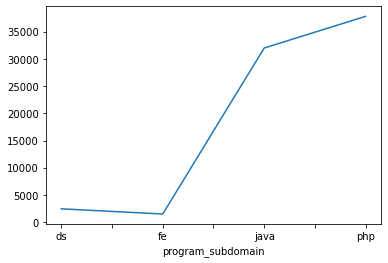

In [15]:
df.groupby('program_subdomain').count_helper.sum().plot()

In [12]:
# Looks like the PHP Full Stack Web Development has the most traffic.

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

### 7. Which lessons are least accessed?

### 8. Anything else I should be aware of?